In [141]:
import numpy as np
import importlib 
import src.flow_ot as flow_ot
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.datasets import make_blobs

Centers: [[-1.65955991  4.40648987]
 [-9.9977125  -3.95334855]
 [-7.06488218 -8.1532281 ]]


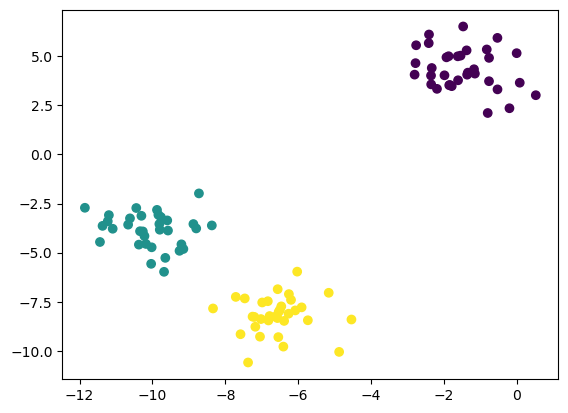

In [95]:
# Experimental set-up, generate data points X from a mixture of Gaussians. 
# We will use the first two dimensions of X as the observed data points and
# the last two dimensions as the hidden factors.
X, z, centers = make_blobs(n_samples=100, centers=3, n_features=2, random_state=1, return_centers=True)
z = z.reshape(100, 1)
plt.scatter(X[:, 0], X[:, 1], c=z)
print("Centers:", centers)

In [97]:
def run_bary_experiment(y_init, X, z, lam, verbose, lr=0.01, max_iter=1000, adaptive_lr=False, scaled_vis=True): 
    # Run the barycenter experiment
    y = flow_ot.compute_barycenter(X, z, y_init, lam=lam, barycenter_cost_grad=flow_ot.gaussian_kernel_kl_grad,
                                   verbose=verbose, lr=lr, max_iter=max_iter, adaptive_lr=adaptive_lr)
    # Plot the results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.scatter(X[:, 0], X[:, 1], c=z)
    if scaled_vis: 
        plt.xlim(-15, 15)
        plt.ylim(-15, 15)
    plt.title("Original X distribution")
    plt.subplot(1, 3, 2)
    plt.scatter(y_init[:, 0], y_init[:, 1], c=z)
    if scaled_vis: 
        plt.xlim(-15, 15)
        plt.ylim(-15, 15)
    plt.title("Initial y distribution")
    plt.subplot(1, 3, 3)
    plt.scatter(y[:, 0], y[:, 1], c=z)
    if scaled_vis: 
        plt.xlim(-15, 15)
        plt.ylim(-15, 15)
    plt.title("Final y distribution")
    plt.show()
    # return the experimental results 
    return y

Iteration 100: gradient norm = 40.51259893568511
Iteration 200: gradient norm = 14.838595653273087
Iteration 300: gradient norm = 5.435386587527959
Iteration 400: gradient norm = 1.9907053711650053
Iteration 500: gradient norm = 0.728879485374258
Iteration 600: gradient norm = 0.26685290364040576
Iteration 700: gradient norm = 0.09769653159586945
Iteration 800: gradient norm = 0.03576714342735843
Iteration 900: gradient norm = 0.013094520965841506
Iteration 1000: gradient norm = 0.004793978618317199


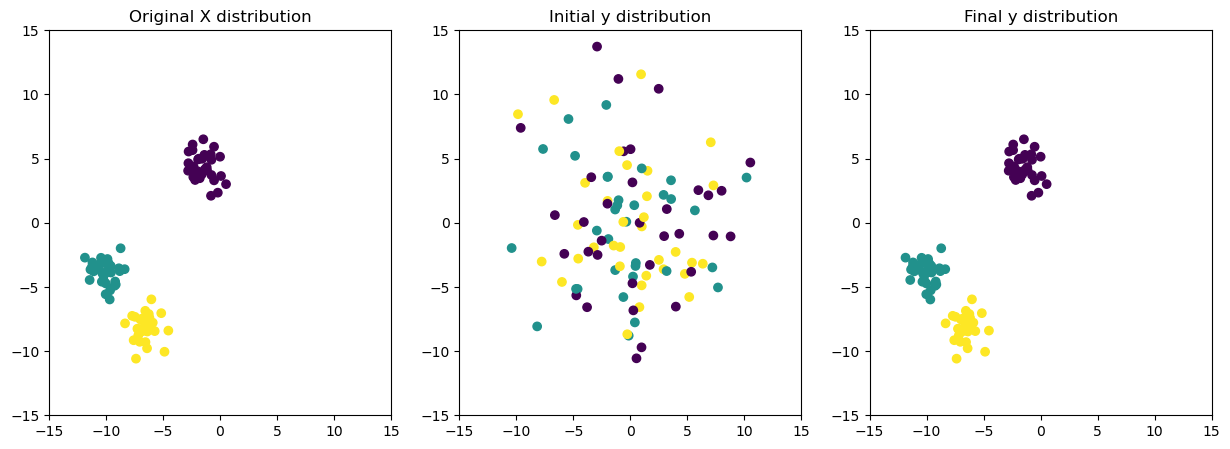

In [98]:
np.random.seed(26)
gauss_grid = np.random.randn(X.shape[0], X.shape[1]) * 5
y = run_bary_experiment(gauss_grid, X, z, lam=0.1, verbose=True, lr=0.01, max_iter=1000, adaptive_lr=False, scaled_vis=True)

Iteration 100: gradient norm = 34.16222856391838
Iteration 200: gradient norm = 16.69981657391627
Iteration 300: gradient norm = 9.07191652507235
Iteration 400: gradient norm = 5.0577151652330965
Iteration 500: gradient norm = 3.7769024802512567
Iteration 600: gradient norm = 2.2972687021989793
Iteration 700: gradient norm = 1.2921511727431951
Iteration 800: gradient norm = 1.0674390228612938
Iteration 900: gradient norm = 0.4919558937979589
Iteration 1000: gradient norm = 0.3044390069283861


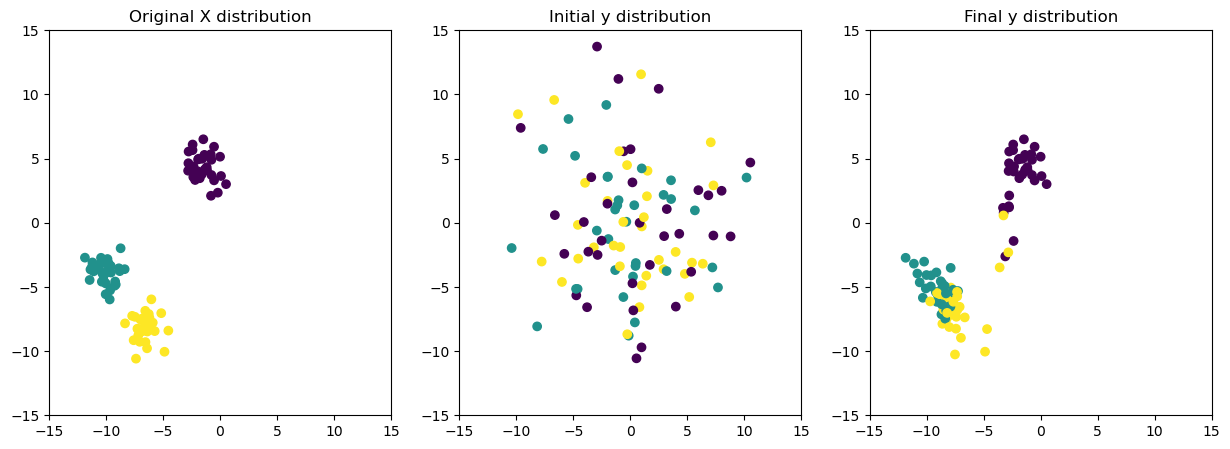

In [99]:
np.random.seed(26)
gauss_grid = np.random.randn(X.shape[0], X.shape[1]) * 5
y = run_bary_experiment(gauss_grid, X, z, lam=25, verbose=True, lr=0.01, max_iter=1000, adaptive_lr=False, scaled_vis=True)

Iteration 100: gradient norm = 26.013863165379753
Iteration 200: gradient norm = 11.04368711965529
Iteration 300: gradient norm = 5.637007526985836
Iteration 400: gradient norm = 2.7153753056067935
Iteration 500: gradient norm = 1.3711325802050203
Iteration 600: gradient norm = 0.6400979093359376
Iteration 700: gradient norm = 0.47664427831688916
Iteration 800: gradient norm = 0.49413537297696364
Iteration 900: gradient norm = 0.5565785240196216
Iteration 1000: gradient norm = 0.8457989143216175


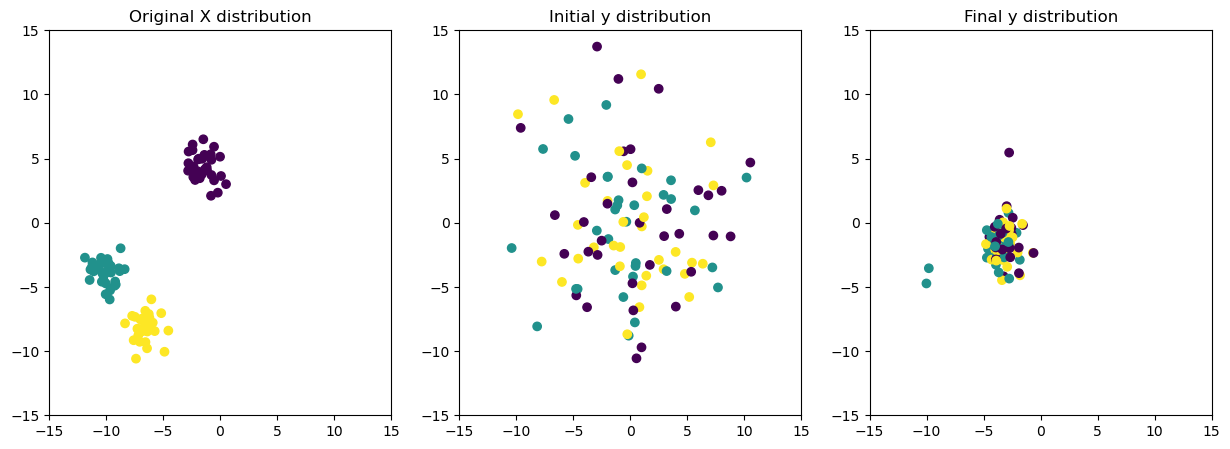

In [100]:
np.random.seed(26)
gauss_grid = np.random.randn(X.shape[0], X.shape[1]) * 5
y = run_bary_experiment(gauss_grid, X, z, lam=250, verbose=True, lr=0.01, max_iter=1000, adaptive_lr=False, scaled_vis=True)

## Specific Function Tests

Check the functionality of certain numpy operations used within the module

In [119]:
import numpy as np
import src.flow_ot as flow_ot 
importlib.reload(flow_ot)

# define the individual gaussian kernel
def gauss_kern(x_i, x_l, sigma=1.0): 
    return np.exp(-np.sum((x_i - x_l)**2) / (2 * sigma **2))

# simulate some arbitrary data points 
x_i = np.array([1, 2, 3])
x_l = np.array([1, 1, 1])
X = np.array([x_i, x_l], dtype = np.float64)

# display the X matrix 
print("X: \n{}".format(X))
print("X shape: {}\n".format(X.shape))

# compute the kernel matrix
K_x = flow_ot.gaussian_kernel(X, sigma=1.0)
print("K_x: \n{}\n".format(K_x))

K_z = flow_ot.gaussian_kernel(Z, sigma=1.0)
print("K_z: \n{}".format(K_z))

X: 
[[1. 2. 3.]
 [1. 1. 1.]]
X shape: (2, 3)

K_x: 
[[1.       0.082085]
 [0.082085 1.      ]]

K_z: 
[[1.         0.60653066 0.60653066 ... 1.         0.13533528 1.        ]
 [0.60653066 1.         1.         ... 0.60653066 0.60653066 0.60653066]
 [0.60653066 1.         1.         ... 0.60653066 0.60653066 0.60653066]
 ...
 [1.         0.60653066 0.60653066 ... 1.         0.13533528 1.        ]
 [0.13533528 0.60653066 0.60653066 ... 0.13533528 1.         0.13533528]
 [1.         0.60653066 0.60653066 ... 1.         0.13533528 1.        ]]


Next up, leverage the finite difference method to get if the gradient is computed correctly.

In [134]:
# again, simulate some arbitrary data points for testing
importlib.reload(flow_ot)
np.random.seed(26)
N_SAMPLES = 100
X, Z, centers = make_blobs(N_SAMPLES, centers=3, n_features=2, random_state=1, return_centers=True)
# print("X\n", X)
Z = Z.reshape(N_SAMPLES, 1)
# print("Z\n", Z, "\n")
Y = np.random.randn(X.shape[0], X.shape[1]) * 5
# Y = X
result = flow_ot.compute_barycenter(X, Z, Y, lam=500, barycenter_cost_grad=flow_ot.gaussian_kernel_kl_grad, max_iter = 1000)
result

array([[-3.06421048e+00, -3.87627620e+00],
       [-2.75975817e+00, -2.38391754e+00],
       [-4.50494675e+00, -2.67137007e+00],
       [-3.10808653e+00, -9.87743364e-01],
       [-1.20495706e+00, -2.38732311e+00],
       [-2.83044867e+00, -1.70733153e+00],
       [-2.91572851e+00, -2.14733725e+00],
       [-2.92143069e+00, -2.15202359e+00],
       [-4.46099320e+00, -4.49822821e-01],
       [-2.91066047e+00, -1.47601792e+00],
       [-3.69919529e+00, -3.88061986e+00],
       [-3.18567997e+00, -7.03592124e-01],
       [-3.90583893e+00, -2.37102269e+00],
       [-3.76788787e+00,  4.66133107e-03],
       [-1.46035674e+00, -3.39312228e+00],
       [-2.64064047e+00, -1.43825944e+00],
       [-3.51949571e+00, -7.93738589e-01],
       [-3.98468779e+00, -2.42914976e+00],
       [-3.65132211e+00, -1.88397409e+00],
       [-4.18614832e+00, -1.97256218e+00],
       [-3.16185303e+00, -1.33187598e+00],
       [-3.59902533e+00, -1.87000335e+00],
       [-3.50931218e+00, -2.07635419e+00],
       [-3.

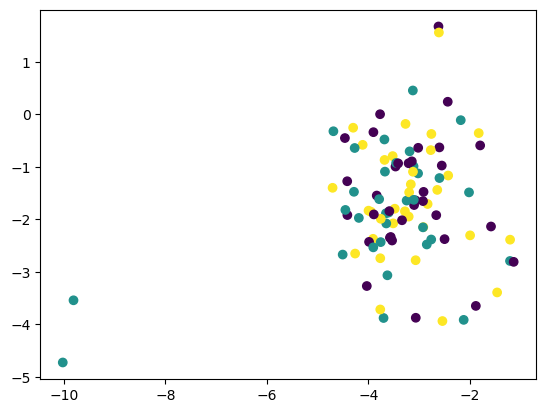

In [140]:
plt.scatter(result[:, 0], result[:, 1], c=Z)

In [133]:
def perturbing_Y(Y, epsilon, direction, i): 
    Y_perturbed = np.copy(Y)
    Y_perturbed[i, :] += epsilon * direction
    return Y_perturbed

def finite_difference(epsilon, test_vectors, i, lam=1.0): 
    return [(flow_ot.compute_L(X, perturbing_Y(Y, epsilon, direction, i), Z, lam=lam) - flow_ot.compute_L(X, perturbing_Y(Y, -epsilon, direction, i), Z, lam=lam)) / (2 * epsilon) for direction in test_vectors]

def plot_log_grad_difference(i, lam = 50): 
    """
    Plot a log-log plot of the finite difference approximation of the gradient

    Inputs: 
        - i: the index of the data point to compute the gradient for
        - lam: the regularization parameter
    """
    # compute the gradient of the loss function 
    grad = flow_ot.gaussian_kernel_kl_grad(X, Y, lam, flow_ot.gaussian_kernel(Y), flow_ot.gaussian_kernel(Z))[i]
    # compute the finite difference approximation of the gradient 
    epsilons = np.array([10**i for i in range(-20, 20)])
    test_vectors = np.eye(X.shape[1])
    grad_diff = np.array([np.linalg.norm(finite_difference(epsilon, test_vectors, i, lam=lam) - grad) for epsilon in epsilons])
    # plot the results 
    plt.figure(figsize=(10, 5))
    plt.loglog(epsilons, np.abs(grad_diff), label="Gradient")
    plt.legend()
    plt.show()

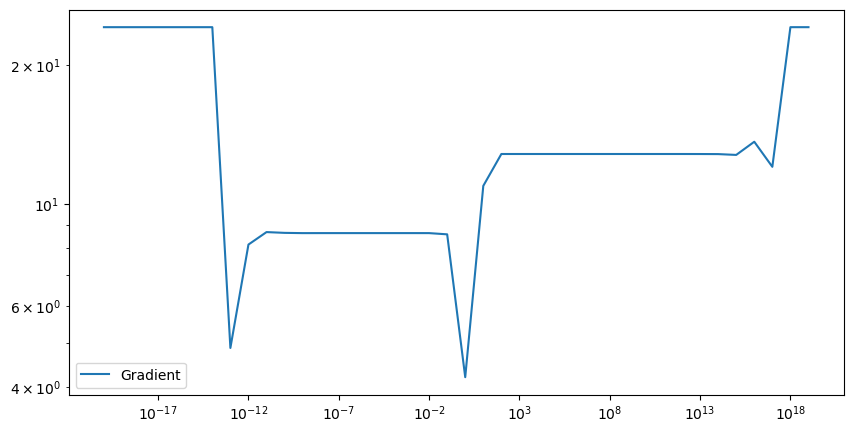

In [132]:
plot_log_grad_difference(0)

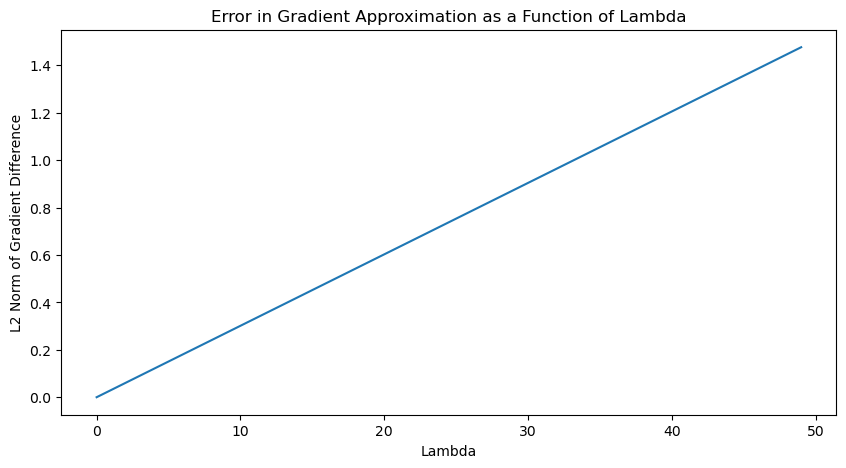

In [144]:
# plot the change in gradient norm as a function of lambda
EPSILON = 0.0001
INDEX = 1
diff = []
for lam in range(50): 
    grad = flow_ot.gaussian_kernel_kl_grad(X, Y, lam, flow_ot.gaussian_kernel(Y), flow_ot.gaussian_kernel(Z))[INDEX]
    approx = finite_difference(EPSILON, np.eye(X.shape[1]), INDEX, lam=lam)
    diff.append(np.linalg.norm(grad - approx))
plt.figure(figsize=(10, 5))
plt.plot(diff)
plt.title("Error in Gradient Approximation as a Function of Lambda")
plt.xlabel("Lambda")
plt.ylabel("L2 Norm of Gradient Difference")
plt.show()

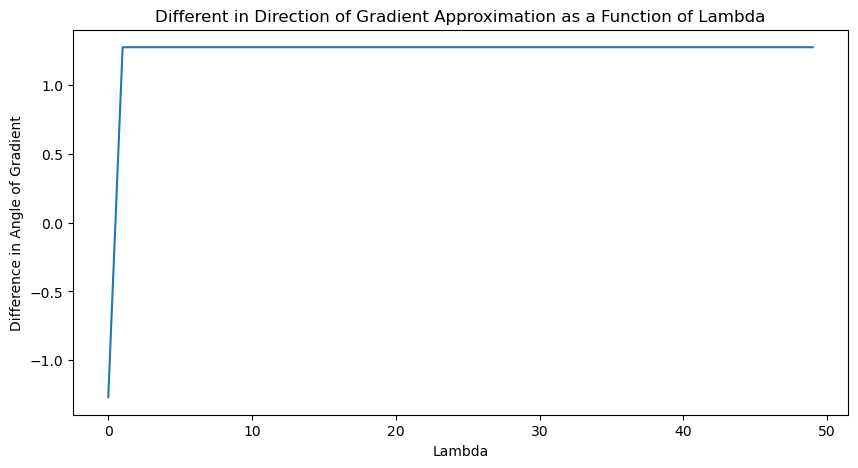

In [150]:
# plot the change in gradient norm as a function of lambda
EPSILON = 0.0001
INDEX = 1
diff = []
for lam in range(50): 
    grad = flow_ot.gaussian_kernel_kl_grad(X, Y, lam, flow_ot.gaussian_kernel(Y), flow_ot.gaussian_kernel(Z))[INDEX]
    approx = finite_difference(EPSILON, np.eye(X.shape[1]), INDEX, lam=lam)
    diff.append(np.arctan((grad[1] - approx[1]) / (grad[0] - approx[0])))
plt.figure(figsize=(10, 5))
plt.plot(diff)
plt.title("Different in Direction of Gradient Approximation as a Function of Lambda")
plt.xlabel("Lambda")
plt.ylabel("Difference in Angle of Gradient")
plt.show()